<a href="https://colab.research.google.com/github/LalithaPriyaK/MNIST-number-recognition/blob/main/MNIST_number_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data('digits')



11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train.shape

(60000, 28, 28)

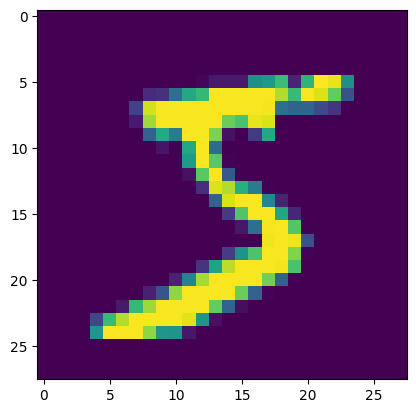

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

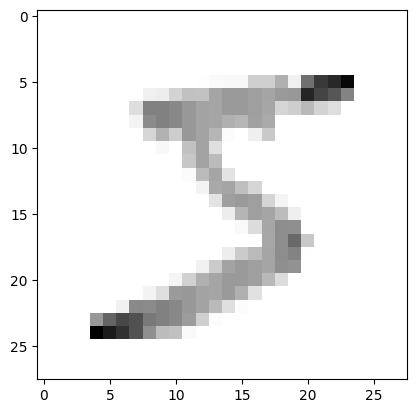

In [8]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])

5


In [11]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training Samples Dimension",x_trainr.shape)
print("Testing Samples Dimension",x_testr.shape)

Training Samples Dimension (60000, 28, 28, 1)
Testing Samples Dimension (10000, 28, 28, 1)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten, Conv2D, MaxPooling2D

In [14]:
#Creating Model
model=Sequential()

#First Convolution Layer
model.add(Conv2D(32,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fully Convoluted Layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#Fully Convoluted Layer2
model.add(Dense(32))
model.add(Activation("relu"))

#Last Fully Connected Layer
model.add(Dense(10))
model.add(Activation("softmax"))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_5 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 activation_6 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [16]:
print("TotalTraining Samples=",len(x_trainr))

TotalTraining Samples= 60000


In [17]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [18]:
hist=model.fit(x_trainr,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 52s 34ms/step - loss: 0.2220 - accuracy: 0.9306 - val_loss: 0.0797 - val_accuracy: 0.9772
Epoch 2/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0709 - accuracy: 0.9776 - val_loss: 0.0592 - val_accuracy: 0.9825
Epoch 3/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0488 - accuracy: 0.9848 - val_loss: 0.0526 - val_accuracy: 0.9837
Epoch 4/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.0479 - val_accuracy: 0.9854
Epoch 5/10
1500/1500 [==============================] - 50s 34ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0588 - val_accuracy: 0.9836
Epoch 6/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0227 - accuracy: 0.9928 - val_loss: 0.0544 - val_accuracy: 0.9852
Epoch 7/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0176 - accuracy: 0.9941 - val_loss: 0.0463 -

In [19]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
hist.history

{'loss': [0.22198425233364105,
  0.07094593346118927,
  0.048767298460006714,
  0.03637992963194847,
  0.028488265350461006,
  0.02274090237915516,
  0.017601443454623222,
  0.015847478061914444,
  0.012986158020794392,
  0.010689286515116692],
 'accuracy': [0.9306458234786987,
  0.9776250123977661,
  0.9848333597183228,
  0.9884583353996277,
  0.9906458258628845,
  0.9928125143051147,
  0.9941250085830688,
  0.9947083592414856,
  0.9956458210945129,
  0.9961249828338623],
 'val_loss': [0.07965324074029922,
  0.05920989811420441,
  0.05257309973239899,
  0.04785187914967537,
  0.0588027760386467,
  0.054375484585762024,
  0.04628972336649895,
  0.04319761320948601,
  0.048959746956825256,
  0.05255727097392082],
 'val_accuracy': [0.9772499799728394,
  0.9825000166893005,
  0.9837499856948853,
  0.9854166507720947,
  0.9835833311080933,
  0.9851666688919067,
  0.9863333106040955,
  0.987666666507721,
  0.9870833158493042,
  0.9883333444595337]}

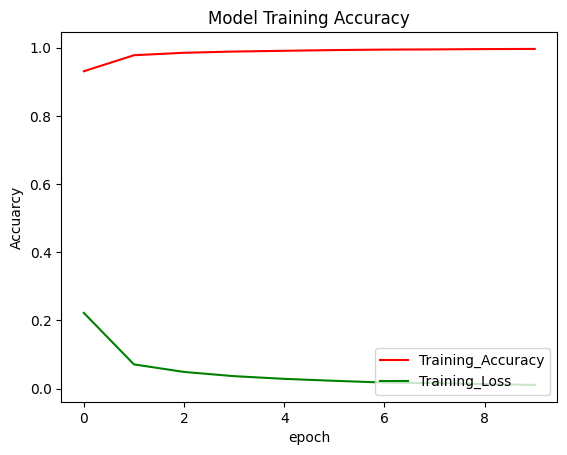

In [21]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],'-r',label='Training_Accuracy')
plt.plot(hist.history['loss'],'-g',label='Training_Loss')

plt.title('Model Training Accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

In [22]:
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("Test loss on 10,000 test samples:", test_loss)
print("Test accuracy on 10,000 test samples:",test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0535 - accuracy: 0.9881
Test loss on 10,000 test samples: 0.05348695069551468
Test accuracy on 10,000 test samples: 0.988099992275238


In [23]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [24]:
y_pred=model.predict(x_testr)
y_pred[ :5]

313/313 [==============================] - 4s 11ms/step


array([[1.3762984e-10, 1.1966511e-08, 5.8161600e-09, 1.1411514e-08,
        3.1669006e-12, 6.1822101e-12, 1.9984448e-19, 9.9999994e-01,
        1.4043980e-12, 5.0404325e-09],
       [6.8253474e-14, 2.1308559e-10, 9.9999994e-01, 9.7923810e-15,
        2.4340770e-16, 6.0946472e-23, 1.4701983e-18, 5.4527555e-15,
        7.0734881e-12, 1.3761504e-15],
       [1.5947170e-10, 9.9999791e-01, 6.7040151e-10, 4.1484278e-11,
        6.9348052e-09, 8.6898542e-09, 4.8492943e-10, 2.0595728e-06,
        5.3228431e-09, 3.8769829e-10],
       [9.9999994e-01, 2.9644311e-11, 1.8294755e-10, 3.5625836e-09,
        1.1363745e-13, 2.1368388e-10, 5.3434654e-08, 1.2379694e-11,
        9.3695518e-14, 3.1791622e-12],
       [3.0800442e-20, 1.3391346e-13, 7.4756786e-13, 3.5187567e-12,
        9.9999994e-01, 2.3362794e-16, 1.9558126e-17, 1.5354367e-13,
        6.6373990e-13, 2.8554665e-13]], dtype=float32)

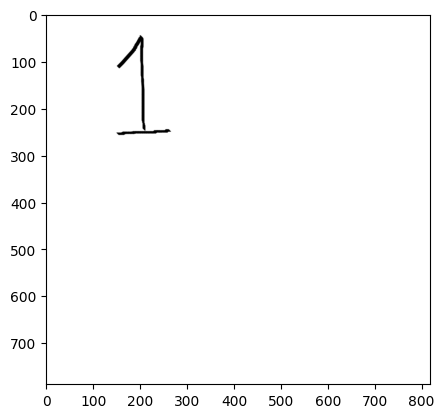

In [26]:
import cv2
img=cv2.imread('/content/1.png')
plt.imshow(img)

In [27]:
img.shape

(788, 819, 3)

In [28]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [29]:
gray.shape

(788, 819)

In [30]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [31]:
resized.shape

(28, 28)

In [32]:
newimg=tf.keras.utils.normalize(resized,axis=1)

In [33]:
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [34]:
newimg.shape

(1, 28, 28, 1)

In [36]:
predictions = model.predict(newimg)
predictions[0]

1/1 [==============================] - 0s 81ms/step


array([0.37714183, 0.4127069 , 0.03611054, 0.01062275, 0.03948496,
       0.01021615, 0.00809893, 0.04833354, 0.02940793, 0.02787638],
      dtype=float32)

In [37]:
print(np.argmax(predictions,axis=1))

[1]
